In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("⚡ Using device:", device)

⚡ Using device: cuda


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Image_Vision/24932529.zip"
extract_to = "/content/drive/MyDrive/Image_Vision/video_zips"  # unzip here

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Successfully extracted 24932529.zip into video_zips/")


✅ Successfully extracted 24932529.zip into video_zips/


In [ ]:
import os
import zipfile

zip_dir = "/content/drive/MyDrive/Image_Vision/video_zips"
output_dir = "/content/drive/MyDrive/Image_Vision/unzipped_videos"

os.makedirs(output_dir, exist_ok=True)

for file in sorted(os.listdir(zip_dir)):
    if file.endswith(".zip") and file.startswith("video_"):
        zip_path = os.path.join(zip_dir, file)
        folder_name = file.replace(".zip", "")
        extract_path = os.path.join(output_dir, folder_name)

        if not os.path.exists(extract_path):
            try:
                print(f"🔓 Unzipping {file}...")
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(extract_path)
                print(f"✅ Done: {folder_name}")
            except zipfile.BadZipFile:
                print(f"❌ Skipping {file} — not a valid zip.")
        else:
            print(f"🟡 Already unzipped: {folder_name}")


🔓 Unzipping video_01.zip...
✅ Done: video_01
🔓 Unzipping video_02.zip...
✅ Done: video_02
🔓 Unzipping video_03.zip...
✅ Done: video_03
🔓 Unzipping video_04.zip...
✅ Done: video_04
🔓 Unzipping video_05.zip...
✅ Done: video_05
🔓 Unzipping video_06.zip...
✅ Done: video_06
🔓 Unzipping video_07.zip...
✅ Done: video_07
🔓 Unzipping video_08.zip...
✅ Done: video_08
🔓 Unzipping video_09.zip...
✅ Done: video_09
🔓 Unzipping video_10.zip...
✅ Done: video_10
🔓 Unzipping video_11_1.zip...
✅ Done: video_11_1
🔓 Unzipping video_11_2.zip...
✅ Done: video_11_2
🔓 Unzipping video_12.zip...
✅ Done: video_12
🔓 Unzipping video_13.zip...
✅ Done: video_13
🔓 Unzipping video_14.zip...
✅ Done: video_14
🔓 Unzipping video_15_1.zip...
✅ Done: video_15_1
🔓 Unzipping video_15_2.zip...
✅ Done: video_15_2
🔓 Unzipping video_16.zip...
✅ Done: video_16
🔓 Unzipping video_17_1.zip...
✅ Done: video_17_1
🔓 Unzipping video_17_2.zip...
✅ Done: video_17_2
🔓 Unzipping video_18.zip...
✅ Done: video_18
🔓 Unzipping video_19.zip...
✅ D

In [ ]:
#Extract Frames From All Videos
import cv2
import os

def extract_frames(video_path, output_dir, every_n=1):
    os.makedirs(output_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_idx = 0
    saved_idx = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % every_n == 0:
            out_path = os.path.join(output_dir, f"{frame_idx:09d}.jpg")
            cv2.imwrite(out_path, frame)
            saved_idx += 1
        frame_idx += 1

    cap.release()
    print(f"✅ Extracted {saved_idx} frames from {os.path.basename(video_path)}")

# Batch extract frames
input_base = "/content/drive/MyDrive/Image_Vision/unzipped_videos"
output_base = "/content/drive/MyDrive/Image_Vision/extracted_frames"

for folder in sorted(os.listdir(input_base)):
    video_path = os.path.join(input_base, folder, "video_left.avi")
    output_dir = os.path.join(output_base, folder)

    if os.path.exists(video_path):
        print(f"🎞 Extracting frames from: {folder}")
        extract_frames(video_path, output_dir)
    else:
        print(f"⚠️ Missing video_left.avi in {folder}, skipping...")


🎞 Extracting frames from: video_01
✅ Extracted 33741 frames from video_left.avi
🎞 Extracting frames from: video_02
✅ Extracted 19756 frames from video_left.avi
🎞 Extracting frames from: video_03
✅ Extracted 31305 frames from video_left.avi
🎞 Extracting frames from: video_04
✅ Extracted 7812 frames from video_left.avi
🎞 Extracting frames from: video_05
✅ Extracted 16275 frames from video_left.avi
🎞 Extracting frames from: video_06
✅ Extracted 42356 frames from video_left.avi
🎞 Extracting frames from: video_07
✅ Extracted 16294 frames from video_left.avi
🎞 Extracting frames from: video_08
✅ Extracted 8878 frames from video_left.avi
🎞 Extracting frames from: video_09
✅ Extracted 15816 frames from video_left.avi
🎞 Extracting frames from: video_10
✅ Extracted 7642 frames from video_left.avi
🎞 Extracting frames from: video_11_1
✅ Extracted 14211 frames from video_left.avi
🎞 Extracting frames from: video_11_2
✅ Extracted 8091 frames from video_left.avi
🎞 Extracting frames from: video_12
✅ Ext

In [ ]:
import cv2
import os

def extract_every_nth_frame(video_path, output_dir, every_n=5):
    os.makedirs(output_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_idx = 0
    saved_idx = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % every_n == 0:
            out_path = os.path.join(output_dir, f"{frame_idx:09d}.jpg")
            cv2.imwrite(out_path, frame)
            saved_idx += 1
        frame_idx += 1

    cap.release()
    print(f"✅ {saved_idx} frames saved from {os.path.basename(video_path)} (every {every_n}th)")


In [ ]:
import cv2
import os

def extract_frames_to_drive(video_path, output_dir, every_n=1):
    os.makedirs(output_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    frame_idx = 0
    saved_idx = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % every_n == 0:
            out_path = os.path.join(output_dir, f"{frame_idx:09d}.jpg")
            cv2.imwrite(out_path, frame)
            saved_idx += 1
        frame_idx += 1

    cap.release()
    print(f"Extracted {saved_idx} frames from {os.path.basename(video_path)}")


In [ ]:
#🔁 Example: Extract from one video
video_path = "/content/drive/MyDrive/Image_Vision/videos/video_01/video_left.avi"
output_dir = "/content/drive/MyDrive/Image_Vision/extracted_frames/video_01"

extract_frames_to_drive(video_path, output_dir)


Extracted 0 frames from video_left.avi


In [ ]:
import zipfile
import os
import cv2

# ZIP path
zip_path = "/content/drive/MyDrive/Image_Vision/24932529.zip"
extract_path = "/content/sar-rarp50/train_videos"

# Unzip the dataset
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Videos extracted to:", extract_path)
else:
    print("Videos already extracted.")

# Function to extract frames
def extract_frames_from_videos(video_dir, output_img_dir):
    os.makedirs(output_img_dir, exist_ok=True)
    video_files = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]

    for vid in video_files:
        video_path = os.path.join(video_dir, vid)
        video_name = os.path.splitext(vid)[0]
        out_dir = os.path.join(output_img_dir, video_name)
        os.makedirs(out_dir, exist_ok=True)

        cap = cv2.VideoCapture(video_path)
        frame_idx = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frame_path = os.path.join(out_dir, f"{frame_idx:05d}.jpg")
            cv2.imwrite(frame_path, frame)
            frame_idx += 1
        cap.release()
        print(f"Extracted {frame_idx} frames from {vid}")

# Extract frames
image_output_dir = "/content/sar-rarp50/train_frames"
extract_frames_from_videos(extract_path, image_output_dir)


Videos extracted to: /content/sar-rarp50/train_videos


In [ ]:
import zipfile
import os

video_zips_path = "/content/sar-rarp50/train_videos"
output_path = "/content/sar-rarp50/extracted_videos"

os.makedirs(output_path, exist_ok=True)

# Extract each video_*.zip file
for file in os.listdir(video_zips_path):
    if file.endswith(".zip"):
        zip_file_path = os.path.join(video_zips_path, file)
        folder_name = file.replace(".zip", "")
        extract_to = os.path.join(output_path, folder_name)

        if not os.path.exists(extract_to):
            print(f"Extracting {file}...")
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                zip_ref.extractall(extract_to)
        else:
            print(f"{file} already extracted.")


Extracting video_37.zip...
Extracting video_15_1.zip...
Extracting video_29_1.zip...
Extracting video_32.zip...
Extracting video_28.zip...
Extracting video_25.zip...
Extracting video_27.zip...
Extracting video_02.zip...
Extracting video_19.zip...
Extracting video_12.zip...
Extracting video_40.zip...
Extracting video_05.zip...
Extracting video_11_2.zip...
Extracting video_17_1.zip...
Extracting video_38.zip...
Extracting video_24.zip...
Extracting video_06.zip...
Extracting video_14.zip...
Extracting video_17_2.zip...
Extracting video_09.zip...
Extracting video_04.zip...
Extracting video_01.zip...
Extracting video_33.zip...
Extracting video_13.zip...
Extracting video_22.zip...
Extracting video_26.zip...
Extracting video_10.zip...
Extracting video_23.zip...
Extracting video_39.zip...
Extracting video_11_1.zip...
Extracting video_07.zip...
Extracting video_20.zip...
Extracting video_21.zip...
Extracting video_36.zip...
Extracting video_18.zip...
Extracting video_30.zip...
Extracting video

In [10]:
# Extract Video Frames with Correct Names
import cv2
import os
def extract_frames_matching_masks(video_path, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    frame_idx = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_name = f"{frame_idx:09d}.jpg"  # 9-digit format!
        frame_path = os.path.join(output_dir, frame_name)
        cv2.imwrite(frame_path, frame)
        frame_idx += 1

    cap.release()
    print(f"Extracted {frame_idx} frames with correct naming.")

# Apply to video_01
extract_frames_matching_masks(
    video_path="/content/sar-rarp50/extracted_videos/video_01/video_left.avi",
    output_dir="/content/sar-rarp50/extracted_videos/video_01/frames_fixed"
)


Extracted 0 frames with correct naming.


In [6]:
import os
import cv2
import torch
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset

class SurgicalSegmentationDatasetAll(Dataset):
    def __init__(self, frames_root, masks_root, skip_every=5):
        self.samples = []
        self.skip_every = skip_every

        for video_id in sorted(os.listdir(frames_root)):
            frames_dir = os.path.join(frames_root, video_id)
            masks_dir = os.path.join(masks_root, video_id, "segmentation")

            if not os.path.exists(masks_dir):
                continue

            mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith(".png")])

            for i, mask_file in enumerate(mask_files):
                if i % self.skip_every != 0:
                    continue
                base = mask_file.replace(".png", "")
                frame_path = os.path.join(frames_dir, f"{base}.jpg")
                mask_path = os.path.join(masks_dir, mask_file)

                if not os.path.exists(frame_path):
                    continue

                # ✅ Check if mask is not empty
                mask_check = cv2.imread(mask_path)
                if mask_check is None:
                    continue
                if not np.any(mask_check != 0):
                    continue  # skip all-black masks

                self.samples.append((frame_path, mask_path))

        print(f"✅ Loaded {len(self.samples)} image-mask pairs (every {self.skip_every}th frame, non-empty masks only)")


    def __getitem__(self, idx):
        frame_path, mask_path = self.samples[idx]
        resize_to = (384, 384)

        # Load and preprocess image
        image = cv2.imread(frame_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, resize_to)
        image = transforms.ToTensor()(image)

        # Load and preprocess mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # just one channel
        mask = cv2.resize(mask, resize_to, interpolation=cv2.INTER_NEAREST)
        mask = torch.from_numpy(mask).long()

        return image, mask

    def __len__(self):
        return len(self.samples)


In [7]:
dataset = SurgicalSegmentationDatasetAll(
    frames_root="/content/drive/MyDrive/Image_Vision/extracted_frames",
    masks_root="/content/drive/MyDrive/Image_Vision/unzipped_videos",
    skip_every=5  # or 10 to reduce size
)

img, msk = dataset[0]
print("Image shape:", img.shape)
print("Mask shape:", msk.shape)
print("Unique labels in mask:", torch.unique(msk))

✅ Loaded 2584 image-mask pairs (every 5th frame, non-empty masks only)
Image shape: torch.Size([3, 384, 384])
Mask shape: torch.Size([384, 384])
Unique labels in mask: tensor([0, 1, 2, 3, 8])


In [8]:
#Split & create DataLoaders:

from torch.utils.data import random_split, DataLoader

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4)

In [ ]:
import os
import cv2
import numpy as np

seg_dir = "/content/drive/MyDrive/Image_Vision/unzipped_videos/video_01/segmentation"
found_labels = False

for i in range(0, 200, 5):  # Check every 5th mask up to frame 200
    fname = f"{i:09d}.png"
    path = os.path.join(seg_dir, fname)

    if not os.path.exists(path):
        continue

    mask = cv2.imread(path)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    pixels = mask.reshape(-1, 3)
    unique = np.unique(pixels, axis=0)

    if len(unique) > 1:  # More than just background
        print(f"✅ {fname} contains labels: {unique}")
        found_labels = True
        break
    else:
        print(f"🟡 {fname} is only background")

if not found_labels:
    print("❌ No labeled masks found in this sample.")


In [17]:
from torch.utils.data import DataLoader, random_split

# Reload dataset
dataset = SurgicalSegmentationDatasetAll(
    frames_root="/content/drive/MyDrive/Image_Vision/extracted_frames",
    masks_root="/content/drive/MyDrive/Image_Vision/unzipped_videos",
    skip_every=10
)

# Train/val split
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

# Small batch size for low GPU usage
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=False)


✅ Loaded 1324 image-mask pairs (every 10th frame)


In [33]:
# Define the UNet Model
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self, n_classes):
        super(UNet, self).__init__()

        def conv_block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_ch, out_ch, 3, padding=1),
                nn.ReLU(inplace=True),
            )

        self.down1 = conv_block(3, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.down2 = conv_block(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.down3 = conv_block(128, 256)
        self.pool3 = nn.MaxPool2d(2)
        self.middle = conv_block(256, 512)

        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.upconv3 = conv_block(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.upconv2 = conv_block(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.upconv1 = conv_block(128, 64)
        self.final = nn.Conv2d(64, n_classes, kernel_size=1)


    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(self.pool1(d1))
        d3 = self.down3(self.pool2(d2))
        m = self.middle(self.pool3(d3))
        u3 = self.upconv3(torch.cat([self.up3(m), d3], dim=1))
        u2 = self.upconv2(torch.cat([self.up2(u3), d2], dim=1))
        u1 = self.upconv1(torch.cat([self.up1(u2), d1], dim=1))
        return self.final(u1)


In [35]:
all_labels = []
for _, mask in dataset:
    all_labels.extend(torch.unique(mask).tolist())

print("All unique labels in dataset:", sorted(set(all_labels)))

All unique labels in dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


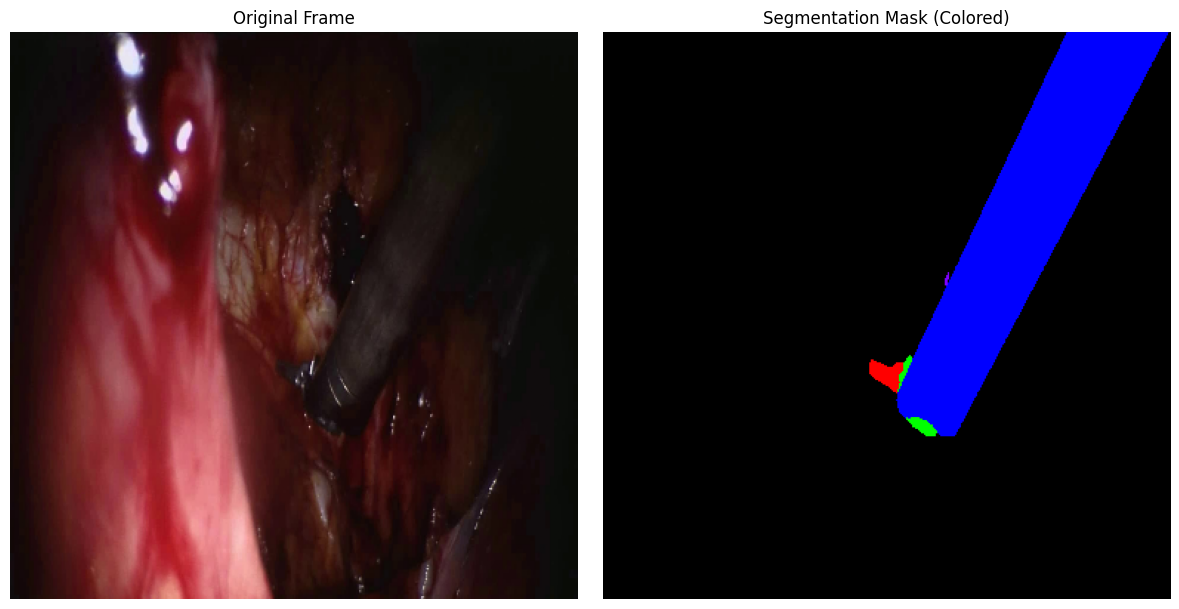

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2

# Visualize a sample
idx = 0  # Or any index you want
image, mask = dataset[idx]

# Convert image tensor to numpy for display
img_np = image.permute(1, 2, 0).numpy()

# Define your colormap (0–9 classes)
label_to_color = {
    0: (0, 0, 0),         # black - background
    1: (255, 0, 0),       # red
    2: (0, 255, 0),       # green
    3: (0, 0, 255),       # blue
    4: (255, 255, 0),     # yellow
    5: (0, 255, 255),     # cyan
    6: (255, 0, 255),     # magenta
    7: (255, 127, 0),     # orange
    8: (127, 0, 255),     # purple
    9: (128, 128, 128),   # gray
}

# Convert mask to RGB
mask_rgb = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
for label, color in label_to_color.items():
    mask_rgb[mask.numpy() == label] = color

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original Frame")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask_rgb)
plt.title("Segmentation Mask (Colored)")
plt.axis("off")
plt.tight_layout()
plt.show()
